<a href="https://colab.research.google.com/github/venkat52/my_colab_notes/blob/main/Module4_Lab3_FMML20210326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent
### Module Coordinator: Tanish Lad

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation} 
\begin{equation} y_1= 3 \end{equation} 

and also add some noise to the data.

In [145]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

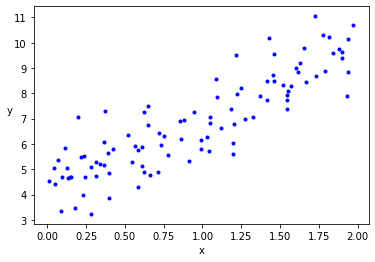

In [146]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2m}  \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2 
\end{equation}

In [147]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds 
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [148]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=1000):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history    

In [156]:
lr = 0.01
n_iter = 10000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.770
Final error: 4032.923


Let's do 1000 iterations with a learning rate of 0.01. 
We will start with a random prediction.

Plotting the error vs Number of iterations

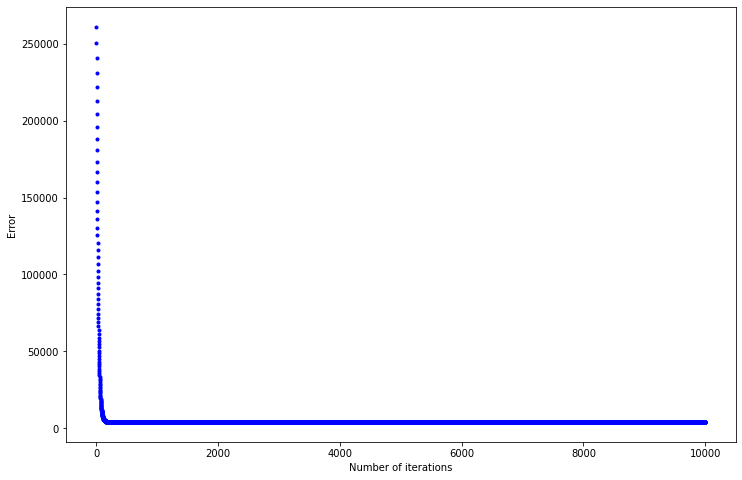

In [157]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

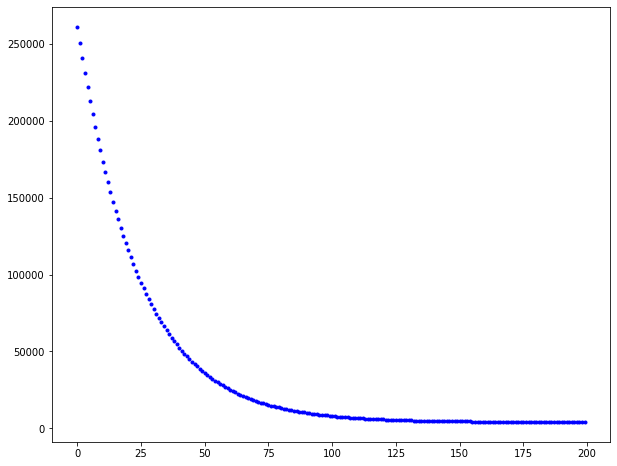

In [158]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [159]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [160]:
lr = 0.5
n_iter = 1000
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.147
y_pred[1]: 2.777
Final error: 52.634


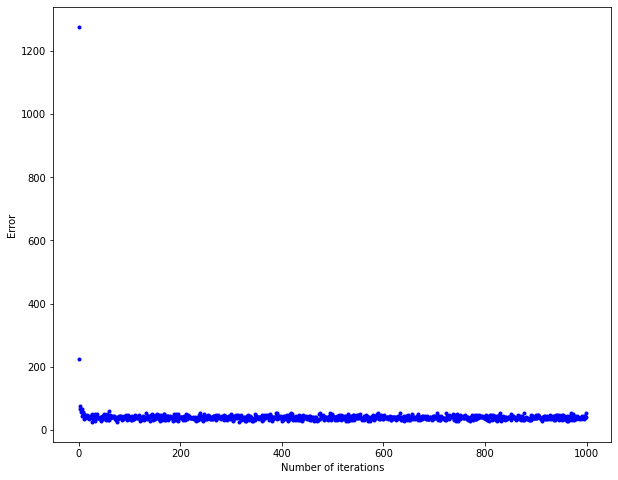

In [161]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [162]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [163]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 4.215
y_pred[1]: 2.768
Final error: 804.439


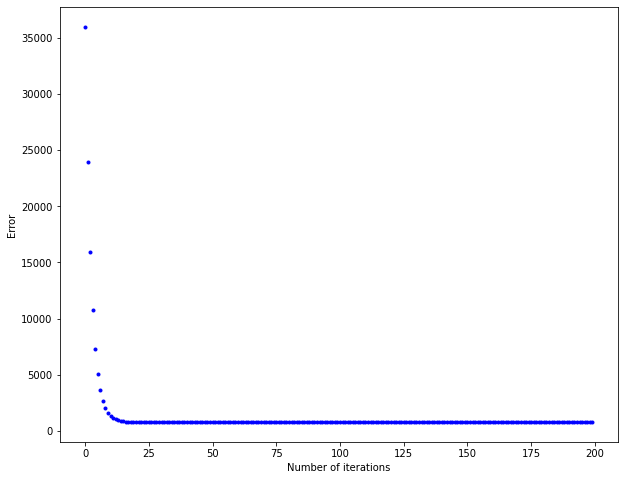

In [164]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

#Answer to Q)1


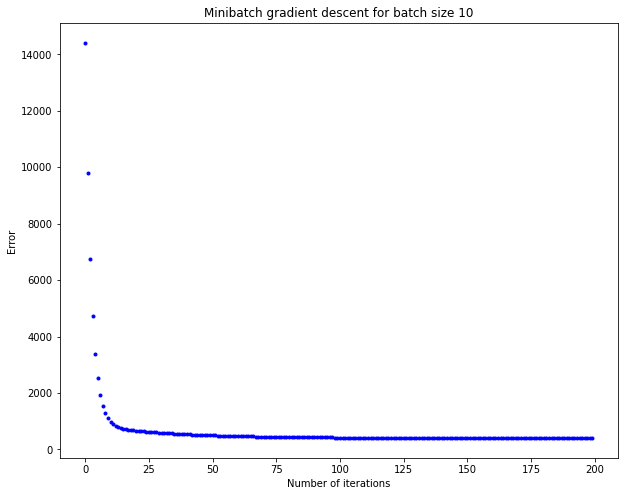

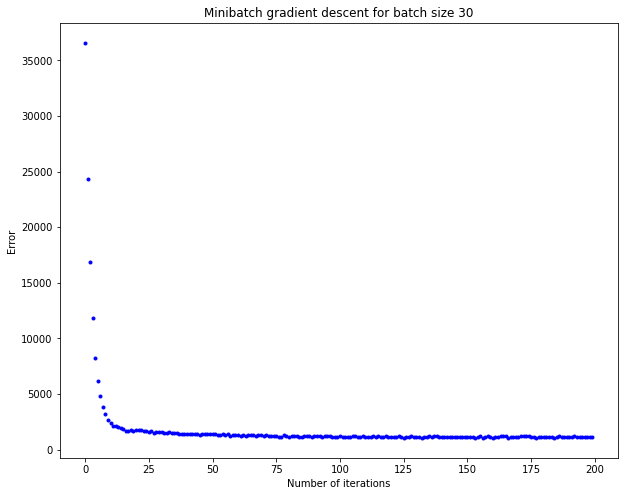

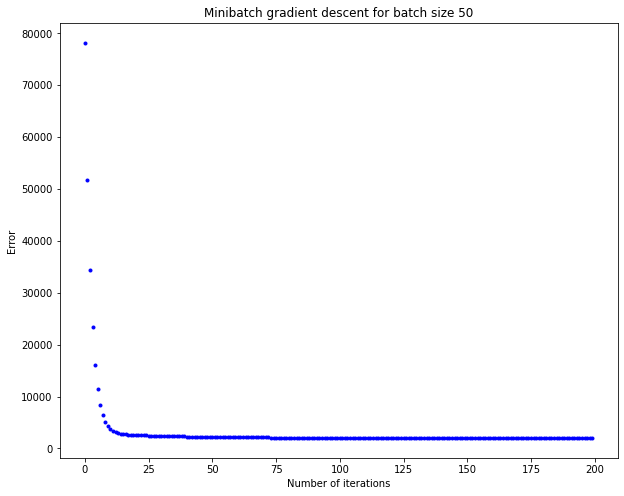

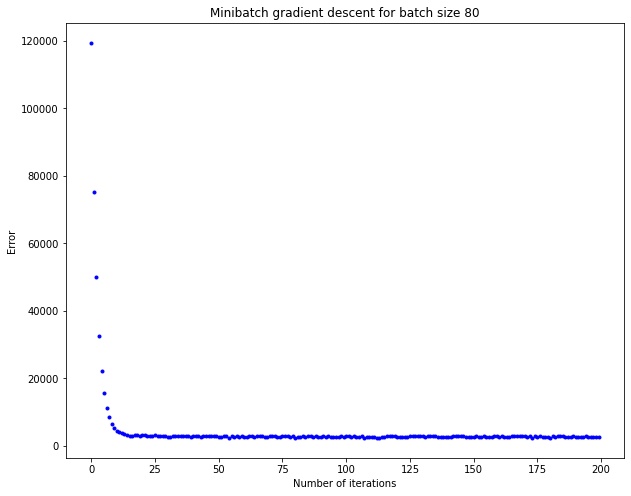

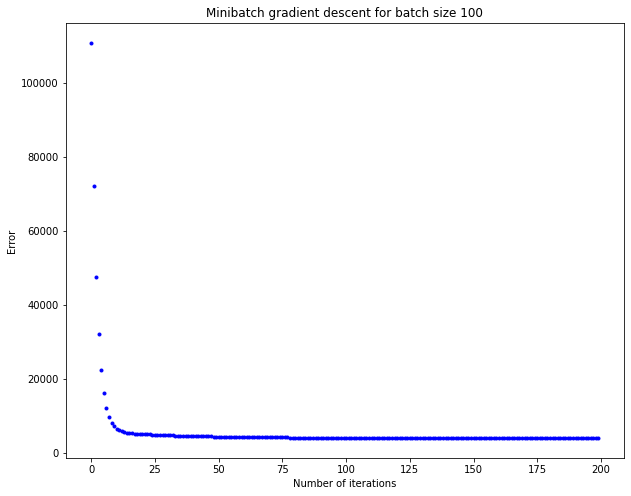

In [166]:
batchs = [10,30,50,80,100]   # varaiable batch sizes
for x in batchs:
  lr = 0.1
  n_iter = 200
  y_pred = np.random.randn(2,1)
  y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter,x)
  
  fig, ax = plt.subplots(figsize=(10,8))

  ax.set_ylabel('Error')
  ax.set_xlabel('Number of iterations')
  y_pred = np.random.randn(2,1)
  plt.title('Minibatch gradient descent for batch size {}'.format(x))
  ax.plot(range(n_iter), cost_history, 'b.')
  plt.show()

#Q)2:  Taking boston dataset as real dataset and code was written below

In [167]:
from sklearn import datasets
s=datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [168]:
import pandas as pd
df=pd.DataFrame(s['data'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [169]:
X = df
y = s['target']
y = y.reshape(len(y),1)

In [170]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=1000):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 14))
    
    for it in range(iterations):    
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)
        
    return y_pred, cost_history, y_pred_history   

In [171]:
lr = 0.000001
n_iter = 20
y_pred = np.random.randn(14,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_preds, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_preds[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -0.786
y_pred[1]: 0.222
Final error: 486014990.062


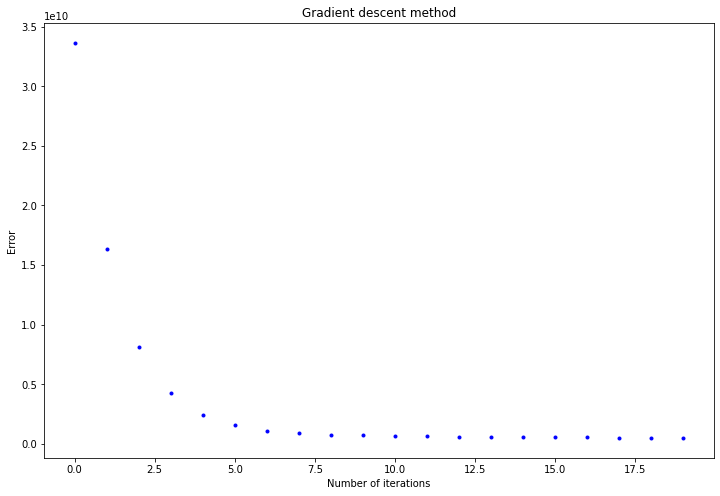

In [172]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
plt.title('Gradient descent method')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

In [173]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        cost = 0.0
        
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [174]:
lr = 0.0005
n_iter = 50
y_pred = np.random.randn(14, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_preds, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_preds[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: -0.745
y_pred[1]: -0.508
Final error: 7975.501


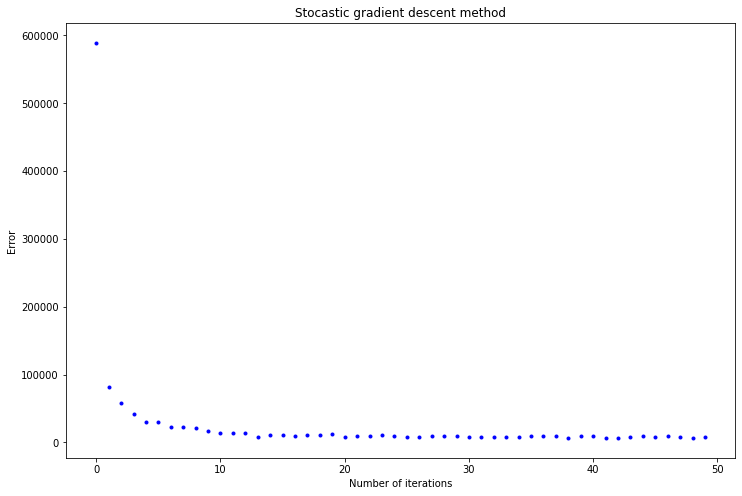

In [175]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
plt.title('Stocastic gradient descent method')
ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

In [176]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    X = X.to_numpy()
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]
            
            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost
        
    return y_pred, cost_history

In [177]:
lr = 0.0000001
n_iter = 200
iteration=100
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred = np.random.randn(14,1)
y_preds, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_preds[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

y_pred[0]: 0.977
y_pred[1]: 0.722
Final error: 10027710.002


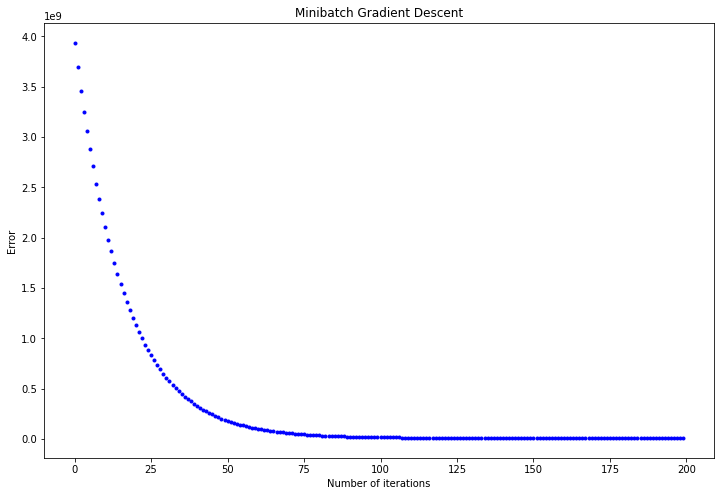

In [178]:
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Minibatch Gradient Descent")
ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

# Q)3: varying the learning rate

In [140]:
learning_rate = [10,0.1,10**(-8),10**(-10),10**(-14),10**(-16)]
for i in learning_rate:
  y_preds, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, i, n_iter)

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f} for gradient descent '.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f} of learning rate:{}'.format(cost_history[-1],i))
print()
print()
print()
for i in learning_rate:
  y_preds, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, i, n_iter)

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f} for stocashtic gradient descent '.format(y_pred[0][0], y_pred[1][0]))
  print('Final error: {:0.3f} of learning rate:{}'.format(cost_history[-1],i))
print()
print()
print()
for i in learning_rate:
  y_preds, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

  print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f} for Minibatch Gradient descent'.format(y_pred[0][0], y_preds[1][0]))
  print('Final error: {:0.3f} of learning rate:{}'.format(cost_history[-1],i))




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in square
  from ipykernel import kernelapp as app


y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: nan of learning rate:10
y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: nan of learning rate:0.1
y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: 301297863.651 of learning rate:1e-08
y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: 422330735.849 of learning rate:1e-10
y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: 424383240.681 of learning rate:1e-14
y_pred[0]: 1.030
y_pred[1]: 1.828 for gradient descent 
Final error: 424383445.093 of learning rate:1e-16



y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: nan of learning rate:10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in subtract


y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: nan of learning rate:0.1
y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: 581359.813 of learning rate:1e-08
y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: 834542.954 of learning rate:1e-10
y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: 822549.800 of learning rate:1e-14
y_pred[0]: 1.030
y_pred[1]: 1.828 for stocashtic gradient descent 
Final error: 809114.666 of learning rate:1e-16



y_pred[0]: 1.030
y_pred[1]: 1.824 for Minibatch Gradient descent
Final error: 7106450.095 of learning rate:10
y_pred[0]: 1.030
y_pred[1]: 1.824 for Minibatch Gradient descent
Final error: 7148179.324 of learning rate:0.1
y_pred[0]: 1.030
y_pred[1]: 1.824 for Minibatch Gradient descent
Final error: 7132111.496 of learning rate:1e-08
y_pred[0]: 1.030
y_pred[1]: 1.824 for Minibatch Gradient descent
Final error: 7140683.567 of learning 

#Answer to Q)3: 
From the above code observation 

For the gradient descent method the dataset required very small learning rate since if learning rate is high than the error is very high that is reason is shows nan value and also we can see that upto  lr=10**(-8)  error decreses but if we even reduce the value the error increses

For Stocashtic gradient descent method the dataset required very small learning rate snice if learning rate is high than the error is very high that is reason is shows nan value and also upto lr = 10**(-8) the error keeps on decreasing if we even decrese the learning rate the error starts incresing

For the Minibatch Gradient descent method we can observe that their is No Significant Change in the error by increasing or by decreasing the learning rate